In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [175]:
df = pd.read_csv("../data/MSFT.csv")


new_df = df[['Date', 'Adj Close']]
new_df['Date'] = pd.to_datetime(new_df['Date'])
new_df



C:\Users\Nisarg\AppData\Local\Temp\ipykernel_16992\2452100863.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Date'] = pd.to_datetime(new_df['Date'])


,Date,Adj Close
0,1986-03-13,0.060055
1,1986-03-14,0.062199
2,1986-03-17,0.063272
3,1986-03-18,0.061663
4,1986-03-19,0.060591
...,...,...
9637,2024-06-10,427.869995
9638,2024-06-11,432.679993
9639,2024-06-12,441.059998
9640,2024-06-13,441.579987


In [176]:
# Function to calculate Weighted Moving Average (WMA)
def calculate_wma(prices, window):
    weights = np.arange(1, window + 1)
    wma = prices.rolling(window).apply(lambda prices: np.dot(prices, weights) / weights.sum(), raw=True)
    return wma

# Function to calculate Relative Strength Index (RSI)
def calculate_rsi(prices, window):
    delta = prices.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window).mean()
    avg_loss = loss.rolling(window).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def calculate_fibonacci_levels(prices, window):

    high_price = prices.rolling(window).max()
    low_price = prices.rolling(window).min()
    difference = high_price - low_price
    level1 = high_price - difference * 0.236
    level2 = high_price - difference * 0.382
    level3 = high_price - difference * 0.618
    return level1, level2, level3

def calculate_bollinger_bands(prices, window, num_of_std=2):
    SMA= prices.rolling(window=window).mean()
    STD = prices.rolling(window=window).std()
    UpperBand = SMA + (STD * num_of_std)
    LowerBand = SMA - (STD * num_of_std)
    return UpperBand,LowerBand

def calculate_percentage_change(prices, window):

    pc = []
    
    for i in range(len(prices)):
        if i < window:
            pc.append(pd.NA)
        else:
            start_price = prices[i - window]
            end_price = prices[i]
            pc.append((end_price - start_price) / start_price * 100)
    return pc

In [177]:
new_df['WMA'] = calculate_wma(new_df['Adj Close'], 14)

new_df['RSI'] = calculate_rsi(new_df['Adj Close'], 14)

new_df['BUB'],new_df['BLB'] = calculate_bollinger_bands(new_df['Adj Close'], 14)

new_df['PC'] = calculate_percentage_change(new_df['Adj Close'], 28)

#level1,level2,level3 = calculate_fibonacci_levels(new_df['Adj Close'], 14)
#new_df['Fib 23.6%'] = level1
#new_df['Fib 38.2%'] = level2
#new_df['Fib 61.8%'] = level3


C:\Users\Nisarg\AppData\Local\Temp\ipykernel_16992\827108751.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['WMA'] = calculate_wma(new_df['Adj Close'], 14)
C:\Users\Nisarg\AppData\Local\Temp\ipykernel_16992\827108751.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['RSI'] = calculate_rsi(new_df['Adj Close'], 14)
C:\Users\Nisarg\AppData\Local\Temp\ipykernel_16992\827108751.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

In [178]:
new_df.dropna(inplace=True)
new_df

,Date,Adj Close,WMA,RSI,BUB,BLB,PC
28,1986-04-23,0.061931,0.062276,60.974346,0.065339,0.057796,3.124833
29,1986-04-24,0.068098,0.063147,74.999023,0.067124,0.057237,9.483193
30,1986-04-25,0.072388,0.064508,84.209319,0.070100,0.056253,14.406768
31,1986-04-28,0.072924,0.065807,84.209351,0.072387,0.055957,18.261812
32,1986-04-29,0.070779,0.066688,74.997681,0.073492,0.056384,16.814161
...,...,...,...,...,...,...,...
9637,2024-06-10,427.869995,422.695526,52.784505,436.822397,411.156179,10.09729
9638,2024-06-11,432.679993,423.854286,53.910602,437.657785,410.840789,9.753491
9639,2024-06-12,441.059998,426.095714,59.861540,440.882986,409.121304,11.063634
9640,2024-06-13,441.579987,428.306093,64.452810,444.233197,407.853948,8.782882


In [179]:
# Step 8: Generate buy, sell, and neutral signals for WMA
new_df['WMA Signal'] = np.where(new_df['Adj Close'] > new_df['WMA'], 'Buy',
                                np.where(new_df['Adj Close'] < new_df['WMA'], 'Sell', 'Neutral'))

# Step 9: Generate buy, sell, and neutral signals for RSI
new_df['RSI Signal'] = np.where(new_df['RSI'] < 30, 'Buy',
                                np.where(new_df['RSI'] > 70, 'Sell', 'Neutral'))

##bb, parabolic sar
# Step 10: Generate buy, sell, and neutral signals for Fibonacci levels
# new_df['Fib Signal'] = 'Neutral'
# new_df.loc[(new_df['Adj Close'] > new_df['Fib 23.6%']) & (new_df['Adj Close'].shift(1) <= new_df['Fib 23.6%']), 'Fib Signal'] = 'Buy'
# new_df.loc[(new_df['Adj Close'] < new_df['Fib 23.6%']) & (new_df['Adj Close'].shift(1) >= new_df['Fib 23.6%']), 'Fib Signal'] = 'Sell'
# new_df.loc[(new_df['Adj Close'] > new_df['Fib 38.2%']) & (new_df['Adj Close'].shift(1) <= new_df['Fib 38.2%']), 'Fib Signal'] = 'Buy'
# new_df.loc[(new_df['Adj Close'] < new_df['Fib 38.2%']) & (new_df['Adj Close'].shift(1) >= new_df['Fib 38.2%']), 'Fib Signal'] = 'Sell'
# new_df.loc[(new_df['Adj Close'] > new_df['Fib 61.8%']) & (new_df['Adj Close'].shift(1) <= new_df['Fib 61.8%']), 'Fib Signal'] = 'Buy'
# new_df.loc[(new_df['Adj Close'] < new_df['Fib 61.8%']) & (new_df['Adj Close'].shift(1) >= new_df['Fib 61.8%']), 'Fib Signal'] = 'Sell'

#new_df['All Signal'] = np.where((new_df['WMA Signal'] == 'Buy') & (new_df['RSI Signal'] == 'Buy') & (new_df['Fib Signal'] == 'Buy'), 'Buy',
#                                np.where((new_df['WMA Signal'] == 'Sell') & (new_df['RSI Signal'] == 'Sell') & (new_df['Fib Signal'] == 'Sell'), 'Sell', 'Neutral'))

#new_df['All Signal'] = np.where((new_df['WMA Signal'] == 'Buy') & (new_df['RSI Signal'] == 'Buy') & (new_df['Fib Signal'] == 'Buy'), 'Buy',
#                                np.where((new_df['WMA Signal'] == 'Sell') & (new_df['RSI Signal'] == 'Sell') & (new_df['Fib Signal'] == 'Sell'), 'Sell', 'Neutral'))


In [180]:
new_df

,Date,Adj Close,WMA,RSI,BUB,BLB,PC,WMA Signal,RSI Signal
28,1986-04-23,0.061931,0.062276,60.974346,0.065339,0.057796,3.124833,Sell,Neutral
29,1986-04-24,0.068098,0.063147,74.999023,0.067124,0.057237,9.483193,Buy,Sell
30,1986-04-25,0.072388,0.064508,84.209319,0.070100,0.056253,14.406768,Buy,Sell
31,1986-04-28,0.072924,0.065807,84.209351,0.072387,0.055957,18.261812,Buy,Sell
32,1986-04-29,0.070779,0.066688,74.997681,0.073492,0.056384,16.814161,Buy,Sell
...,...,...,...,...,...,...,...,...,...
9637,2024-06-10,427.869995,422.695526,52.784505,436.822397,411.156179,10.09729,Buy,Neutral
9638,2024-06-11,432.679993,423.854286,53.910602,437.657785,410.840789,9.753491,Buy,Neutral
9639,2024-06-12,441.059998,426.095714,59.861540,440.882986,409.121304,11.063634,Buy,Neutral
9640,2024-06-13,441.579987,428.306093,64.452810,444.233197,407.853948,8.782882,Buy,Neutral


In [181]:
def calculate_profit(df,singal, entry_date=None, exit_date=None, initial_cash=10000):
    cash = initial_cash
    stock = 0
    portfolio_value = []
     # Filter dataframe between entry and exit dates
    df = df[(df['Date'] >= entry_date) & (df['Date'] <= exit_date)]

    for i in range(len(df)):
        if df[singal].iloc[i] == 'Buy' and cash > 0:
            # Buy as many stocks as possible with available cash
            stock = cash / df['Adj Close'].iloc[i]
            cash = 0
            print(singal,df.iloc[i]["Date"], "Buy")
        elif df[singal].iloc[i] == 'Sell' and stock > 0:
            # Sell all stocks
            cash = stock * df['Adj Close'].iloc[i]
            stock = 0
            print(singal,df.iloc[i]["Date"], "Sell")
        # Calculate the current value of the portfolio
        current_value = cash + stock * df['Adj Close'].iloc[i]
        portfolio_value.append(current_value)

    final_value = cash + stock * df['Adj Close'].iloc[-1]
    profit = final_value - initial_cash
    profit_percentage = (profit / initial_cash) * 100
  #  print(df)
    return profit, portfolio_value, profit_percentage , df

# Specify entry and exit dates
exit_date = pd.to_datetime('2024-06-14')
entry_date = exit_date - pd.Timedelta(days=365*5)




#profit, portfolio_value,profit_percentage = calculate_profit(new_df,"WMA Signal",entry_date,exit_date)
#print(f"WMA Signal : Final Profit: ${profit:.2f}, {profit_percentage.round(2)}%")

#profit, portfolio_value,profit_percentage = calculate_profit(new_df,"RSI Signal",entry_date,exit_date)
#print(f"RSI Signal : Final Profit: ${profit:.2f}, {profit_percentage.round(2)}%")

#profit, portfolio_value,profit_percentage = calculate_profit(new_df,"Fib Signal",entry_date,exit_date)
#print(f"Fib Signal : Final Profit: ${profit:.2f}, {profit_percentage.round(2)}%")

#profit, portfolio_value,profit_percentage = calculate_profit(new_df,"All Signal",entry_date,exit_date)
#print(f"All Signal : Final Profit: ${profit:.2f}, {profit_percentage.round(2)}%")

profit, portfolio_value,profit_percentage, filtered_df  = calculate_profit(new_df,"NI",entry_date,exit_date)
print(f"NI : Final Profit: ${profit:.2f}, {profit_percentage.round(2)}%")


KeyError: 'NI'

In [ ]:
# Calculate count of Buy, Sell, and Neutral for each signal column
wma_counts = new_df['WMA Signal'].value_counts()
rsi_counts = new_df['RSI Signal'].value_counts()
#fib_counts = new_df['Fib Signal'].value_counts()
#all_signal_counts = new_df['All Signal'].value_counts()
ni_counts = new_df ['NI'].value_counts()

# Print the counts
print("WMA Signal Counts:")
print(wma_counts)
print("\nRSI Signal Counts:")
print(rsi_counts)
#print("\nFib Signal Counts:")
#print(fib_counts)
#print("\nAll Signal Counts:")
#print(all_signal_counts)
print("\nNI Signal Counts:")
print(ni_counts)

WMA Signal Counts:
WMA Signal
Buy     5561
Sell    4068
Name: count, dtype: int64

RSI Signal Counts:
RSI Signal
Neutral    7250
Sell       1673
Buy         706
Name: count, dtype: int64

NI Signal Counts:
NI
Neutral    6832
Buy        2024
Sell        773
Name: count, dtype: int64


In [ ]:
filtered_df2 = new_df[new_df["NI"].isin([ "Buy","Sell"]) & 
                 (new_df["Date"] >= entry_date) & 
                 (new_df["Date"] <= exit_date)]
#filtered_df = filtered_df[filtered_df["NI"].isin(["Buy", "Sell"])
print(filtered_df2["NI"].value_counts())


NI
Buy     215
Sell     65
Name: count, dtype: int64


KeyError: 'Fib 23.6%'

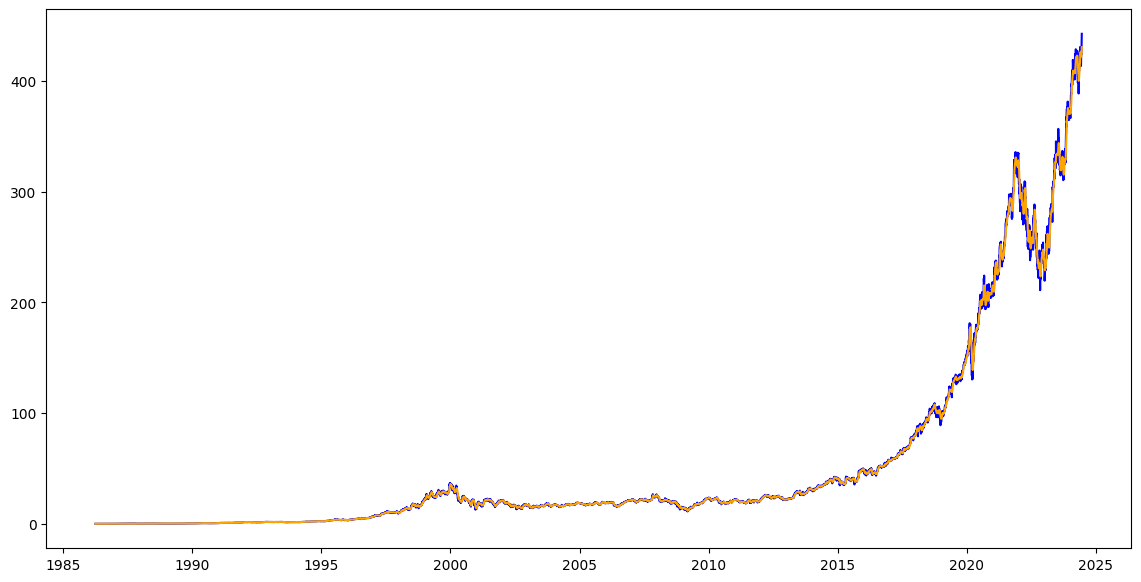

In [ ]:

# Step 12: Plot the chart with indicators
plt.figure(figsize=(14, 7))

# Plot Adjusted Close Price and WMA
plt.plot(new_df['Date'], new_df['Adj Close'], label='Adj Close', color='blue')
plt.plot(new_df['Date'], new_df['WMA'], label='WMA', color='orange')

# Plot Fibonacci Levels
plt.plot(new_df['Date'], new_df['Fib 23.6%'], color='r', linestyle='--', label='Fib 23.6%')
plt.plot(new_df['Date'], new_df['Fib 38.2%'], color='g', linestyle='--', label='Fib 38.2%')
plt.plot(new_df['Date'], new_df['Fib 61.8%'], color='b', linestyle='--', label='Fib 61.8%')

plt.title(f'{ticker} Stock Analysis')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Plot RSI
plt.figure(figsize=(14, 5))
plt.plot(new_df['Date'], new_df['RSI'], label='RSI', color='purple')
plt.axhline(70, color='r', linestyle='--')
plt.axhline(30, color='g', linestyle='--')
plt.title(f'{ticker} RSI')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.grid(True)
plt.show()